# Q3 
## Insurance Dataset

### Clustering and elbow curve

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
insurance=pd.read_csv("Insurance Dataset.csv.xls")

In [4]:
insurance.describe()

,Premiums Paid,Age,Days to Renew,Claims made,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,12542.250000,46.110000,120.400000,12578.993367,102250.000000
std,6790.731666,13.887641,88.055767,13695.906762,43517.237964
min,2800.000000,23.000000,1.000000,1978.260870,28000.000000
25%,6975.000000,34.000000,56.000000,5220.648735,65125.000000
50%,11825.000000,45.000000,89.000000,8386.043907,102250.000000
75%,15475.000000,54.500000,186.500000,14670.889520,139375.000000
max,29900.000000,82.000000,321.000000,99676.744190,176500.000000


In [5]:
insurance.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,2800,26,233,3890.076336,28000
1,2950,27,130,2294.444444,29500
2,3100,28,144,2564.545455,31000
3,3250,30,65,1978.260870,32500
4,3400,32,56,2009.090909,34000


In [6]:
cols = ['Premiums Paid', 'Age', 'Days to Renew', 'Claims made', 'Income']

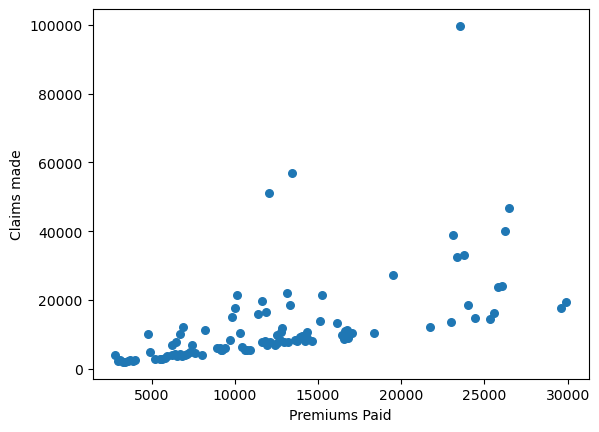

In [9]:
# Initial scatter plot (Premiums Paid vs Claims made)
plt.scatter(insurance['Premiums Paid'], insurance['Claims made'],s=30)
plt.xlabel('Premiums Paid')
plt.ylabel('Claims made')
plt.show()

In [11]:
# Preprocessing using Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()# Fit and transform the selected columns
df_scaled = scaler.fit_transform(insurance[cols])
df_scaled = pd.DataFrame(df_scaled, columns=cols)

## Start KMeans clustering

In [16]:
# Initialize KMeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(df_scaled)
insurance['cluster'] = y_predicted

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
print(insurance.head())

   Premiums Paid  Age  Days to Renew  Claims made  Income  cluster
0           2800   26            233  3890.076336   28000        0
1           2950   27            130  2294.444444   29500        0
2           3100   28            144  2564.545455   31000        0
3           3250   30             65  1978.260870   32500        0
4           3400   32             56  2009.090909   34000        0


In [18]:
# Display cluster centers in the scaled space
print("Cluster Centers (scaled):")
print(km.cluster_centers_)

Cluster Centers (scaled):
[[0.15200436 0.28929122 0.33430398 0.03705034 0.2318641 ]
 [0.50476214 0.45625286 0.21190878 0.08608254 0.71416871]
 [0.55709847 0.50312221 0.77697368 0.31764149 0.70388091]]


In [19]:
centroids_original = scaler.inverse_transform(km.cluster_centers_)
print("Cluster Centers (original scale):")
print(centroids_original)

Cluster Centers (original scale):
[[6.91931818e+03 4.00681818e+01 1.07977273e+02 5.59802332e+03
  6.24318182e+04]
 [1.64790541e+04 4.99189189e+01 6.88108108e+01 1.03883946e+04
  1.34054054e+05]
 [1.78973684e+04 5.26842105e+01 2.49631579e+02 3.30113531e+04
  1.32526316e+05]]


In [20]:
# Creating dataframes for each cluster
df1 = insurance[insurance.cluster == 0]
df2 = insurance[insurance.cluster == 1]
df3 = insurance[insurance.cluster == 2]


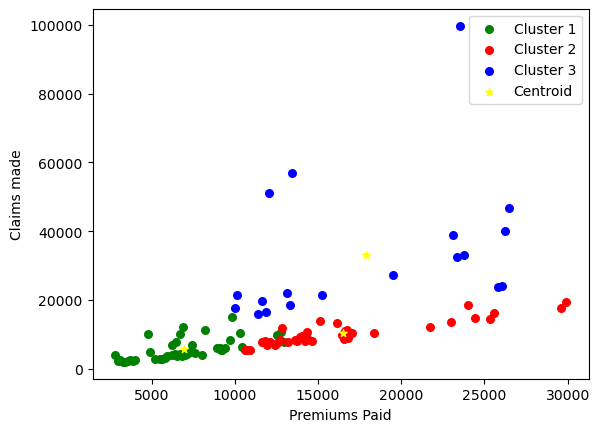

In [23]:
#plotting the cluster centers
plt.scatter(df1['Premiums Paid'], df1['Claims made'], color='green', label='Cluster 1',s=30)
plt.scatter(df2['Premiums Paid'], df2['Claims made'], color='red', label='Cluster 2',s=30)
plt.scatter(df3['Premiums Paid'], df3['Claims made'], color='blue', label='Cluster 3',s=30)
plt.scatter(centroids_original[:, 0], centroids_original[:, 3], color='yellow', marker='*', s=30, label='Centroid')
plt.xlabel('Premiums Paid')
plt.ylabel('Claims made')
plt.legend()
plt.show()

## Elbow curve

In [25]:
#apply normalization
df_norm = scaler.fit_transform(insurance[cols])

In [26]:
#Determine number of clusters
TWSS = []
k = list(range(2, 8))

In [27]:
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

C:\Users\ACER\AppData\Local\Temp\ipykernel_70908\3610680991.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(k, TWSS, 'ro-',color='green')


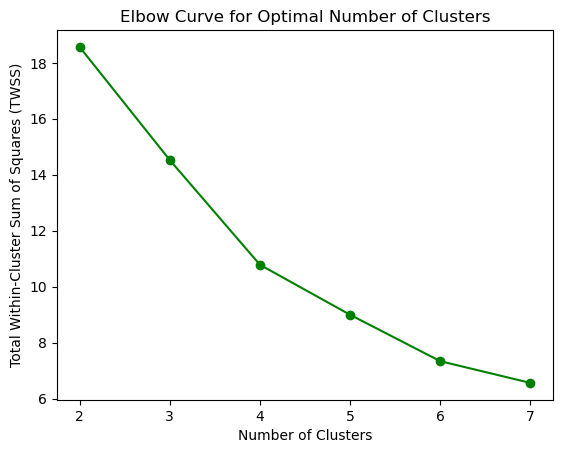

In [29]:
plt.plot(k, TWSS, 'ro-',color='green')
plt.xlabel("Number of Clusters")
plt.ylabel("Total Within-Cluster Sum of Squares (TWSS)")
plt.title("Elbow Curve for Optimal Number of Clusters")
plt.show()